In [1]:
import hoomd
from hoomd import md
hoomd.context.initialize('')

# Create a 10x10x10 simple cubic lattice of particles with type name A
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sc(a=2.0, type_name='A'), n=10)

# Specify Lennard-Jones interactions between particle pairs
nl = md.nlist.cell()
lj = md.pair.lj(r_cut=3.0, nlist=nl)
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0)

# Integrate at constant temperature
md.integrate.mode_standard(dt=0.005)
integrator = hoomd.md.integrate.npt(group=hoomd.group.all(), kT=0.1, tau=1, P=5, tauP=1)
integrator.randomize_velocities(seed=42)

# Run for 10,000 time steps
hoomd.run(10e3)

HOOMD-blue v2.5.2-193-g82065a4dc DOUBLE HPMC_MIXED MPI TBB SSE SSE2 SSE3 SSE4_1 SSE4_2 AVX AVX2 
Compiled: 05/11/2019
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 1000 particles
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 1000
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting

In [2]:
snap = system.take_snapshot()

In [3]:
import plato
import plato.draw.pythreejs as draw
import numpy as np
import matplotlib.cm
import freud
from sklearn.preprocessing import minmax_scale

In [4]:
import numpy as np
import rowan
quats = rowan.from_axis_angle([[1, 0, 0], [0, 1, 0]], [np.arcsin(np.tan(np.pi/6)), np.pi/4])
rotation = rowan.multiply(quats[0], quats[1])

In [25]:
positions = snap.particles.position
ld = freud.density.LocalDensity(3.0, 1.0, 1.0)
box = freud.box.Box.from_box(snap.box)
ld.compute(box, positions)
radii = np.ones(len(positions)) * 0.5
colors = matplotlib.cm.viridis(minmax_scale(ld.density))
box_prim = draw.Lines(
    start_points=[box.makeCoordinates([0, 0, 0]),
                  box.makeCoordinates([0, 0, 0]),
                  box.makeCoordinates([0, 0, 0]),
                  box.makeCoordinates([1, 1, 0]),
                  box.makeCoordinates([1, 1, 0]),
                  box.makeCoordinates([1, 1, 0]),
                  box.makeCoordinates([0, 1, 1]),
                  box.makeCoordinates([0, 1, 1]),
                  box.makeCoordinates([0, 1, 1]),
                  box.makeCoordinates([1, 0, 1]),
                  box.makeCoordinates([1, 0, 1]),
                  box.makeCoordinates([1, 0, 1]),
                 ],
    end_points=[box.makeCoordinates([1, 0, 0]),
                box.makeCoordinates([0, 1, 0]),
                box.makeCoordinates([0, 0, 1]),
                box.makeCoordinates([1, 0, 0]),
                box.makeCoordinates([0, 1, 0]),
                box.makeCoordinates([1, 1, 1]),
                box.makeCoordinates([1, 1, 1]),
                box.makeCoordinates([0, 1, 0]),
                box.makeCoordinates([0, 0, 1]),
                box.makeCoordinates([0, 0, 1]),
                box.makeCoordinates([1, 1, 1]),
                box.makeCoordinates([1, 0, 0]),
               ],
    widths=0.2,
    colors=[[0, 0, 0, 1]]*12,
)
scene = draw.Scene((draw.Spheres(positions=snap.particles.position, radii=radii, colors=colors, vertex_count=256), box_prim),
                   zoom=2)
scene.show()

Renderer(camera=OrthographicCamera(bottom=-15.0, children=(DirectionalLight(intensity=0.692820323027551, posit…

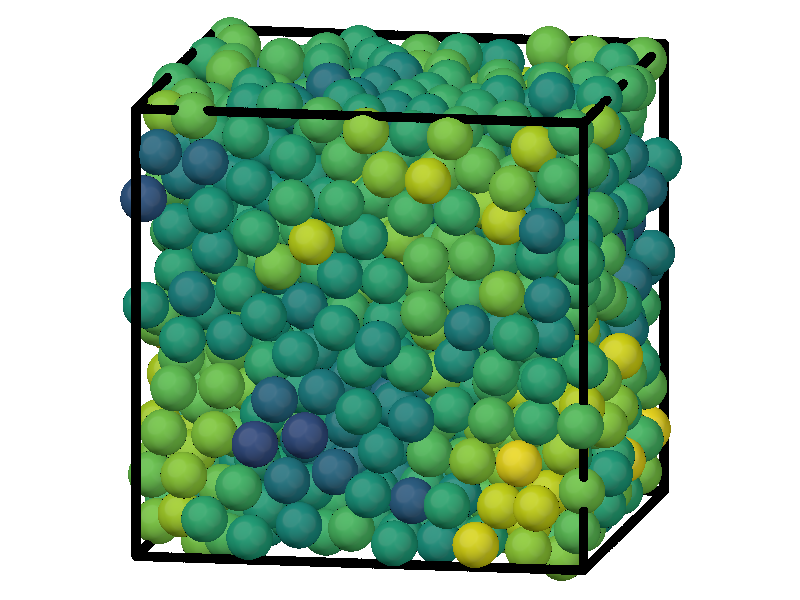

In [31]:
import plato.draw.fresnel
scene.convert(plato.draw.fresnel).show()

In [6]:
import matplotlib.pyplot as plt
rdf = freud.density.RDF(rmax=5, dr=0.1)
rdf.compute(box, positions)a
plt.plot(rdf.R, rdf.RDF)
plt.show()

RuntimeError: The AABBQuery rcut is too large for this box.